In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def p_adic(p, x, n):
  assert isinstance(p, int) and p>0
  assert isinstance(x, int)
  assert isinstance(n, int) and n>0

  p_digits = []
  remainder = x
  for m in range(1,n+1):
    new_digit = remainder%p
    p_digits.append(new_digit)
    remainder = int((remainder-new_digit)/p)

  return p_digits

Testing:

In [3]:
p_adic(3, 43, 10)

[1, 2, 1, 1, 0, 0, 0, 0, 0, 0]

In [4]:
prime = 3
L = p_adic(prime, 61, 12)
reconstructed = sum([d* prime**i for i, d in enumerate(L)])
print(reconstructed)

61


In [5]:
prime = 3
L = p_adic(prime, 11021, 20)
reconstructed = sum([d* prime**i for i, d in enumerate(L)])
print(reconstructed)

11021


In [6]:
def char(p, x, n, m):
  assert isinstance(x, int)
  assert 0 <= x <= (p**n)-1
  assert isinstance(n, int)
  assert isinstance(m, int)
  assert 0 < m <= n

  digit_list = p_adic(p, x, n)
  truncated = digit_list[:m]
  argument_terms = [a/p**(i+1) for i, a in enumerate(digit_list)]
  argument = sum(argument_terms)
  angle_terms = [a * p**(-m+i) for i, a in enumerate(truncated)]
  angle = 2 * np.pi * sum(angle_terms)
  value = np.sin(angle)

  return argument, value


In [7]:
char(3, 25, 8, 3)

(0.6296296296296297, -0.4487991802004632)

In [8]:
p=3
n=11

m=11

for d in range(26, p**n):
  #d = p**n - d
  print('\nNew multiplier:', d)
  arguments = []
  values = []
  for x in tqdm(range(p**n)):
    arg = char(p, x%(p**n), n, m)[0]
    val = .5 - abs(char(p, ((d)*x)%(p**n), n, m)[0]-.5)
    arguments.append(arg)
    values.append(val)

  X = np.array(arguments)
  Y = np.array(values)

  plt.figure(figsize=(18,6))
  plt.scatter(X, Y, marker='.', sizes=[.025])

  plt.show()


New multiplier: 26


 99%|█████████▊| 174728/177147 [00:17<00:00, 10095.01it/s]


KeyboardInterrupt: ignored


New multiplier: 0


100%|██████████| 810000/810000 [00:19<00:00, 41751.70it/s]


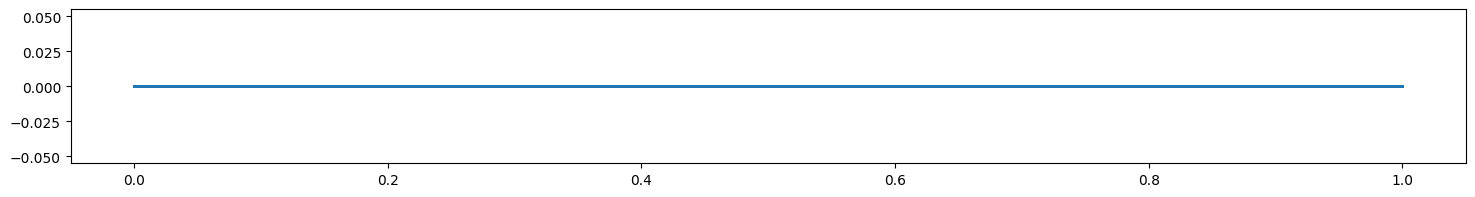


New multiplier: 1


100%|██████████| 810000/810000 [00:17<00:00, 47179.53it/s]


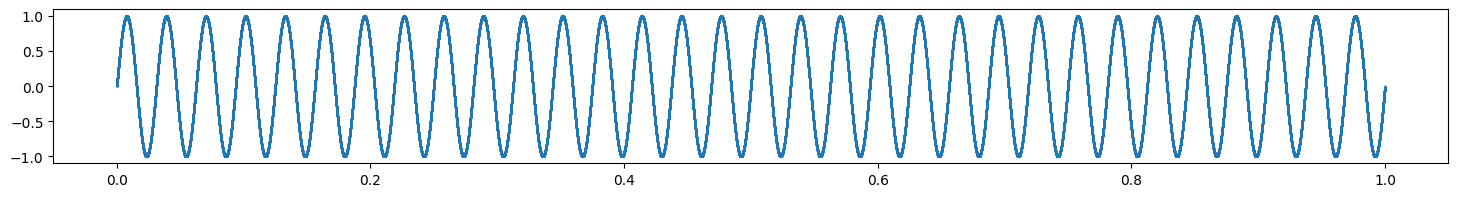


New multiplier: 2


100%|██████████| 810000/810000 [00:17<00:00, 45858.31it/s]


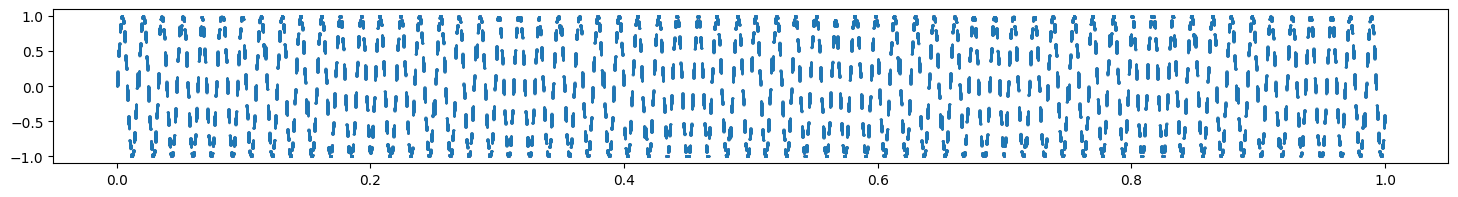


New multiplier: 3


100%|██████████| 810000/810000 [00:17<00:00, 45720.18it/s]


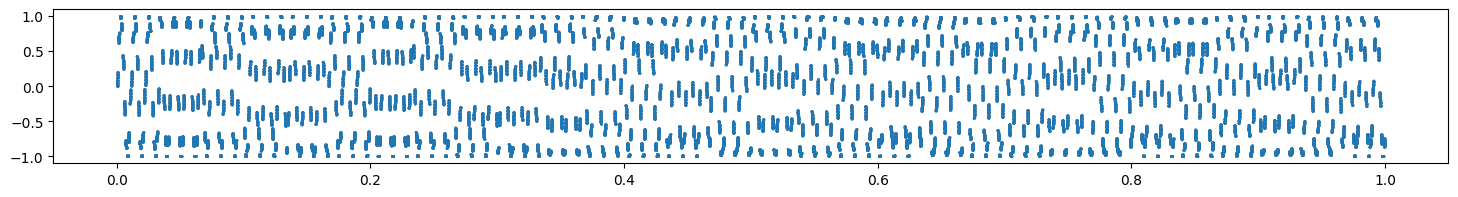


New multiplier: 4


100%|██████████| 810000/810000 [00:17<00:00, 46090.92it/s]


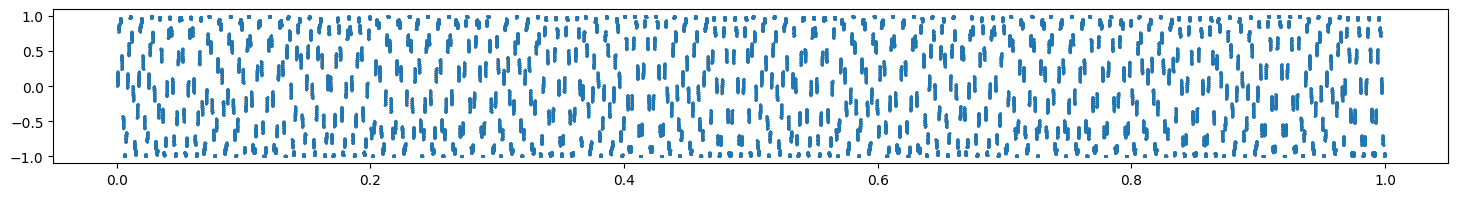


New multiplier: 5


100%|██████████| 810000/810000 [00:19<00:00, 41423.16it/s]


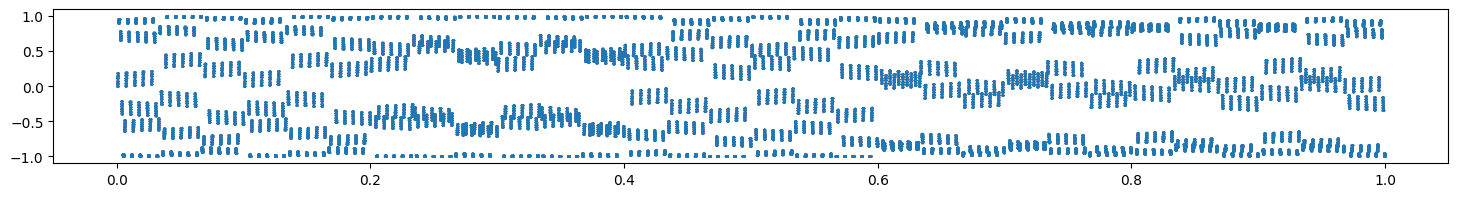


New multiplier: 6


100%|██████████| 810000/810000 [00:17<00:00, 45406.28it/s]


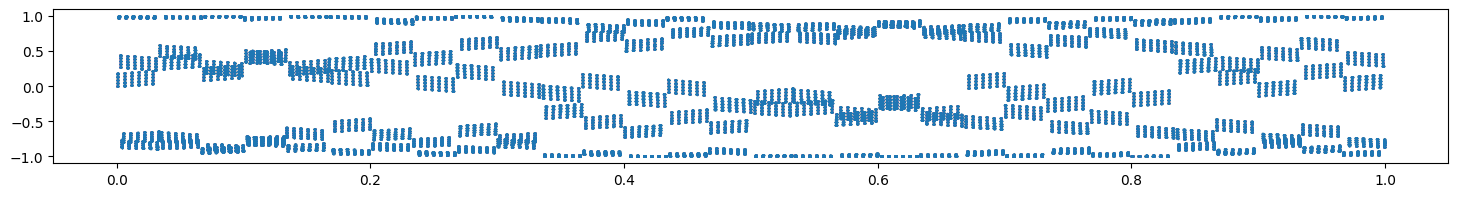


New multiplier: 7


100%|██████████| 810000/810000 [00:19<00:00, 41698.16it/s]


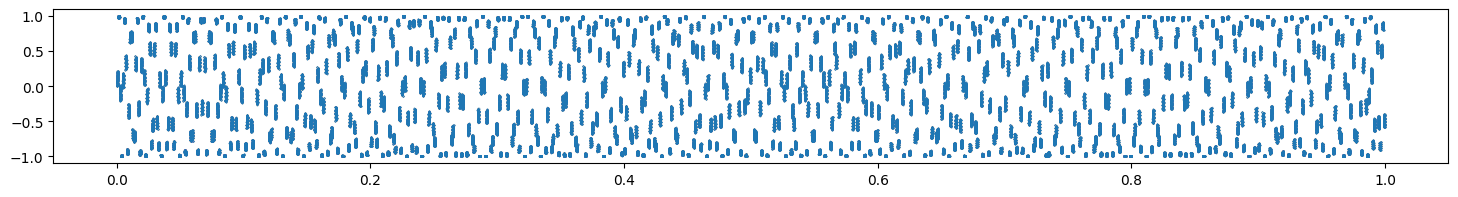


New multiplier: 8


100%|██████████| 810000/810000 [00:17<00:00, 45021.46it/s]


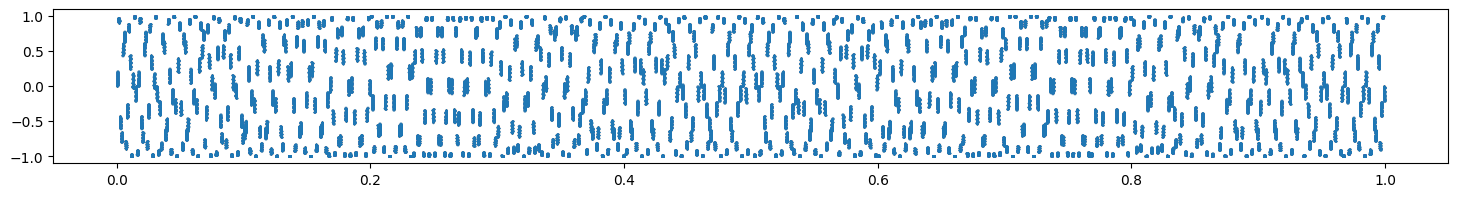


New multiplier: 9


100%|██████████| 810000/810000 [00:19<00:00, 42360.20it/s]


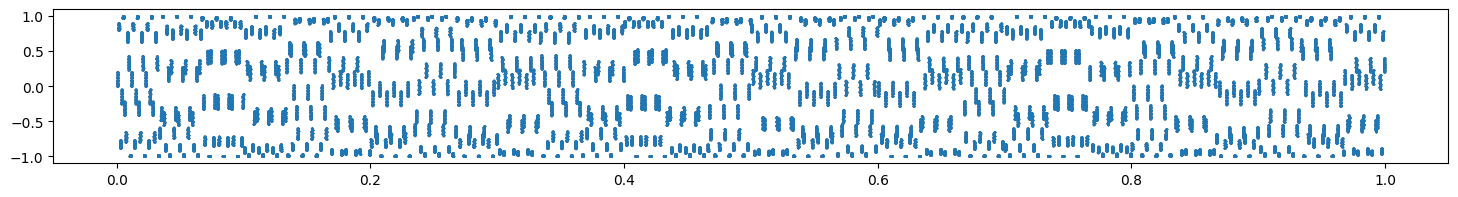


New multiplier: 10


100%|██████████| 810000/810000 [00:18<00:00, 44091.38it/s]


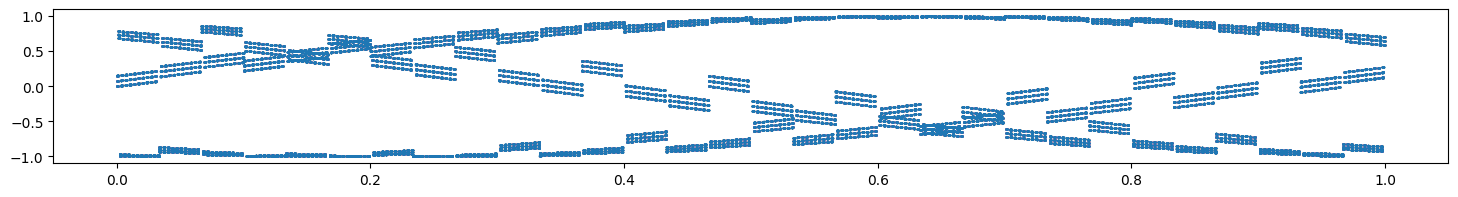


New multiplier: 11


100%|██████████| 810000/810000 [00:19<00:00, 42555.01it/s]


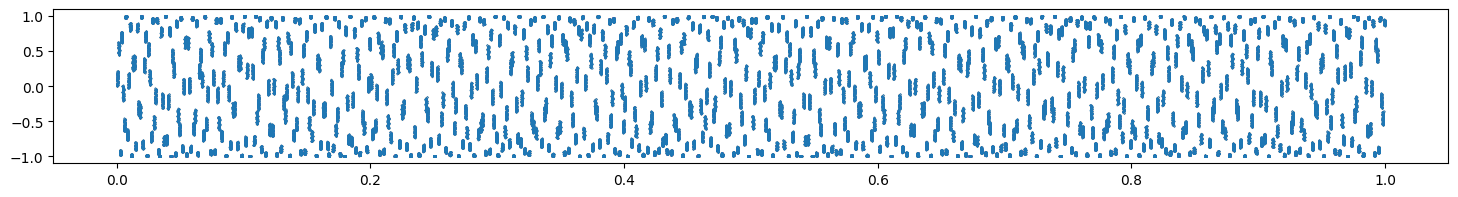


New multiplier: 12


100%|██████████| 810000/810000 [00:19<00:00, 42000.78it/s]


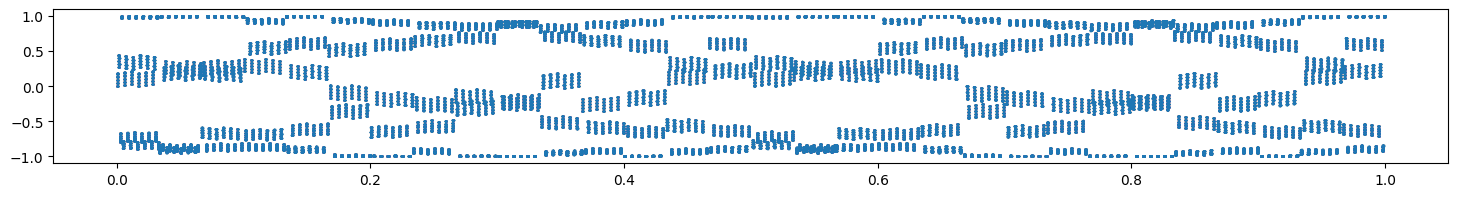


New multiplier: 13


100%|██████████| 810000/810000 [00:18<00:00, 43194.37it/s]


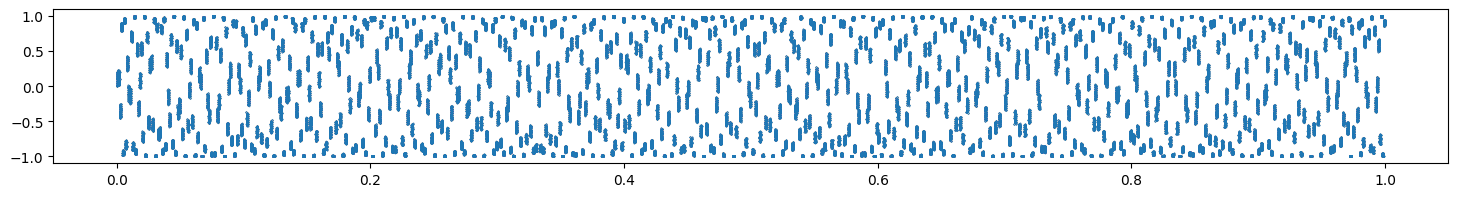


New multiplier: 14


100%|██████████| 810000/810000 [00:19<00:00, 40982.06it/s]


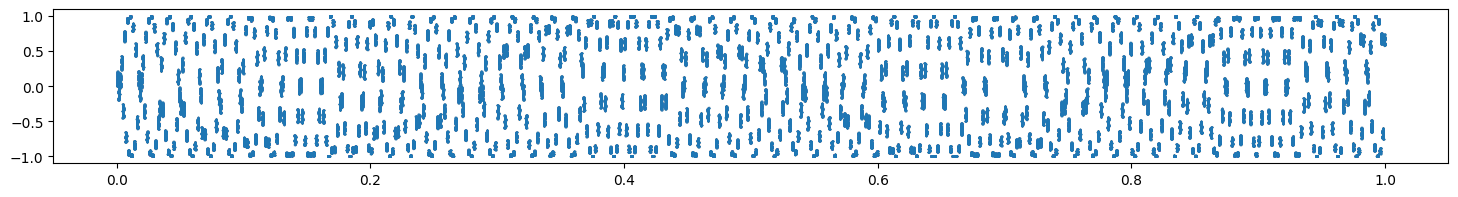


New multiplier: 15


100%|██████████| 810000/810000 [00:19<00:00, 42314.30it/s]


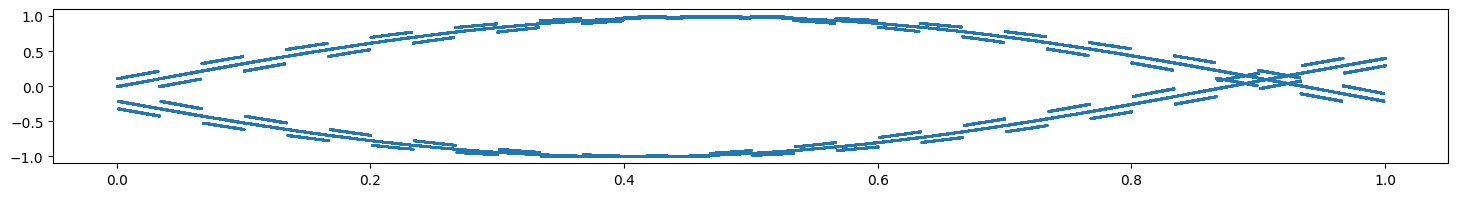


New multiplier: 16


100%|██████████| 810000/810000 [00:20<00:00, 40250.78it/s]


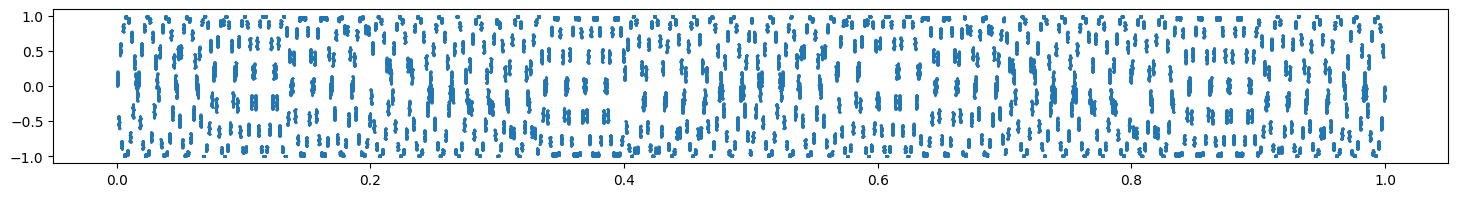


New multiplier: 17


100%|██████████| 810000/810000 [00:19<00:00, 42264.15it/s]


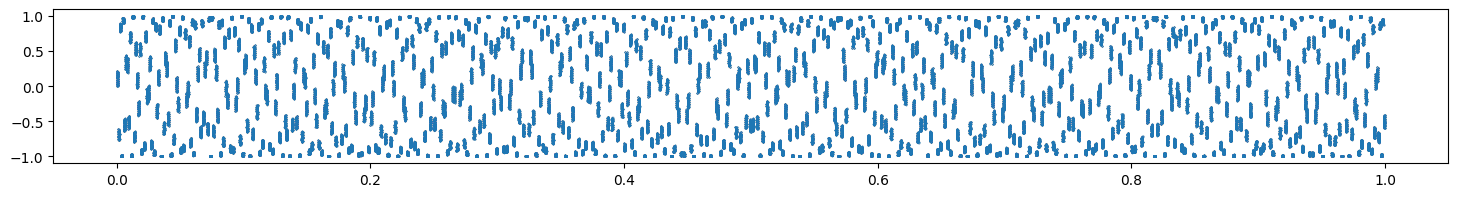


New multiplier: 18


100%|██████████| 810000/810000 [00:20<00:00, 38854.65it/s]


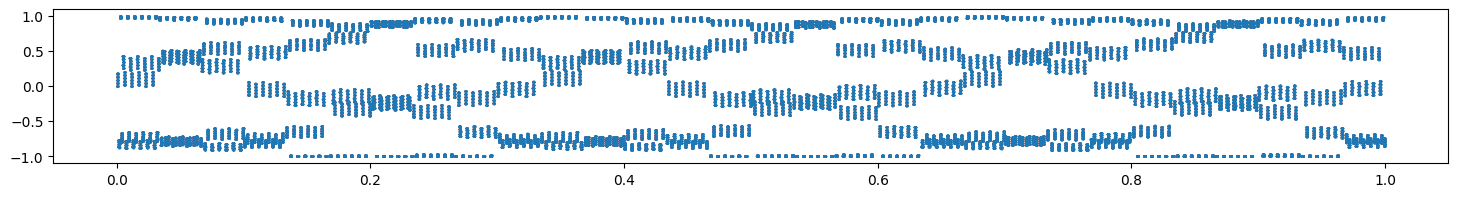


New multiplier: 19


100%|██████████| 810000/810000 [00:19<00:00, 41420.63it/s]


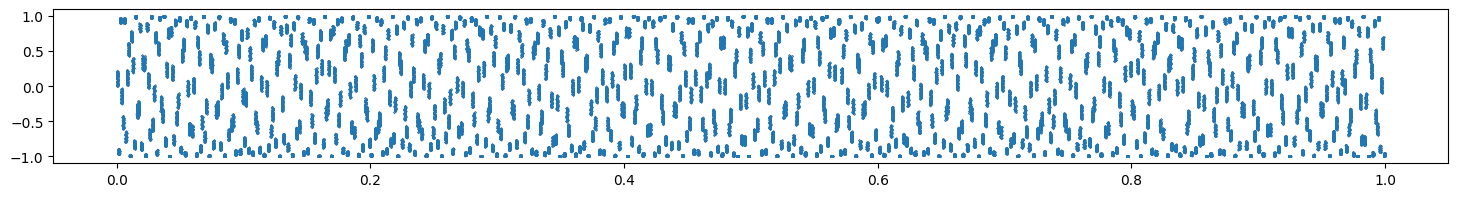


New multiplier: 20


100%|██████████| 810000/810000 [00:25<00:00, 31871.84it/s]


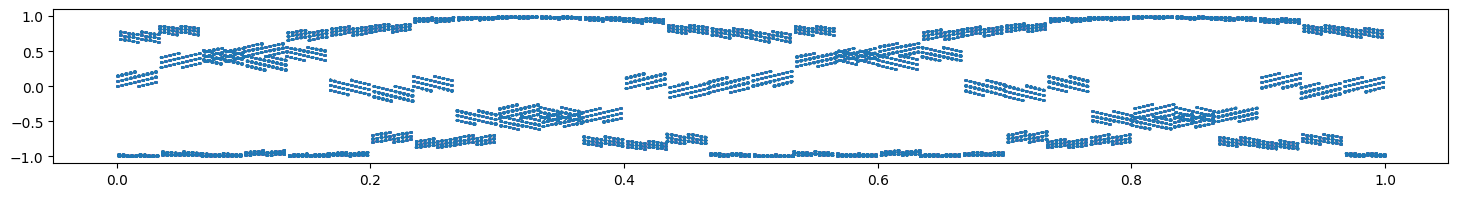


New multiplier: 21


100%|██████████| 810000/810000 [00:19<00:00, 40737.67it/s]


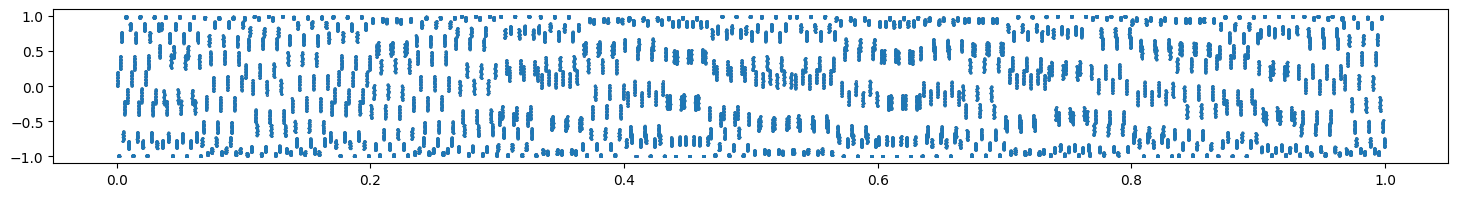


New multiplier: 22


100%|██████████| 810000/810000 [00:21<00:00, 37674.58it/s]


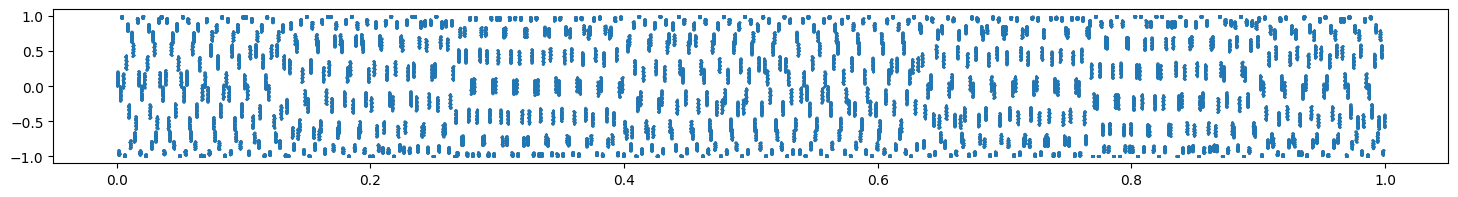


New multiplier: 23


100%|██████████| 810000/810000 [00:20<00:00, 40100.31it/s]


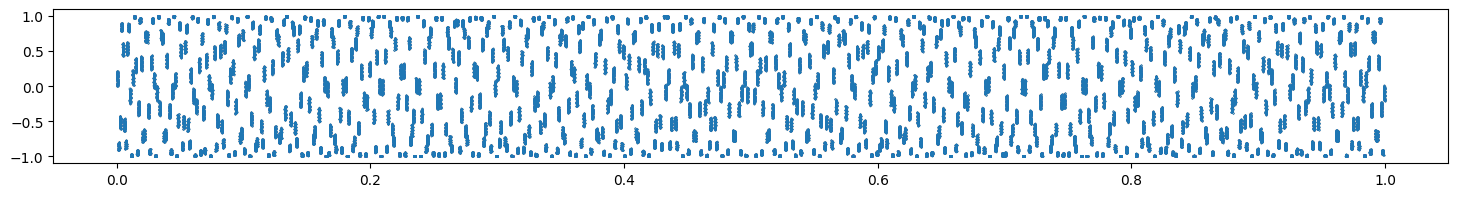


New multiplier: 24


100%|██████████| 810000/810000 [00:22<00:00, 36699.05it/s]


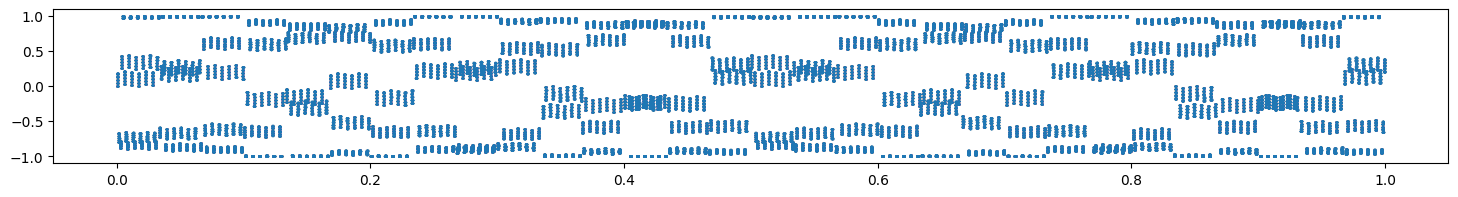


New multiplier: 25


 28%|██▊       | 223082/810000 [00:05<00:13, 42750.83it/s]


KeyboardInterrupt: ignored

In [11]:
p=30
n=4

m=4

for d in range(0, p**n):
  #d = p**n - d
  print('\nNew multiplier:', d)
  arguments = []
  values = []
  for x in tqdm(range(p**n)):
    arg = char(p, x%(p**n), n, m)[0]
    val = np.sin(2 * np.pi * 32 * char(p, ((d)*x)%(p**n), n, m)[0])
    arguments.append(arg)
    values.append(val)

  X = np.array(arguments)
  Y = np.array(values)

  plt.figure(figsize=(18,2))
  plt.scatter(X, Y, marker='.', sizes=[.005])

  plt.show()